In [1]:
#Loading the required packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
train = pd.read_csv('train.csv')
train

test = pd.read_csv('test.csv')
test

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,550744,20006,936.636126,206.101772,41.317189,0.595962,42.813704,3691,69.150872,3456.096107
5948,3764,703,222,5.270621,1.601159,2.338333,0.100503,1.596539,18,139.444444,...,3557,9,0.751434,0.295998,0.100503,0.100503,0.100503,3,2.666667,218.333333
5949,1611042,936,10346,388.093282,65.719046,2.086961,0.349327,1.096322,1637,35.500603,...,140,13838,133.213345,56.027747,2.622550,1.121160,2.622550,562,135.158451,5187.500000
5950,631958,674,7522,614.968745,329.330091,4.052279,1.340566,12.305035,2536,35.838659,...,2799,7371,296.978205,135.831429,15.033026,4.807180,8.262063,1201,87.183775,3547.782285


In [3]:
#Cleaning the data
#Identifying presence of NAs
train.isnull().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

In [4]:
#Creating the required columns
def feat_eng(df):
    df.replace(0, 0.001)
    
    df['follower_diff'] = (df['A_follower_count'] - df['B_follower_count'])
    df['following_diff'] = (df['A_following_count'] - df['B_following_count'])
    df['listed_diff'] = (df['A_listed_count'] - df['B_listed_count'])
    df['ment_rec_diff'] = (df['A_mentions_received'] - df['B_mentions_received'])
    df['rt_rec_diff'] = (df['A_retweets_received'] - df['B_retweets_received'])
    df['ment_sent_diff'] = (df['A_mentions_sent'] - df['B_mentions_sent'])
    df['rt_sent_diff'] = (df['A_retweets_sent'] - df['B_retweets_sent'])
    df['posts_diff'] = (df['A_posts'] - df['B_posts'])
    
    df['follower_ratio'] = (df['A_follower_count'] / df['B_follower_count'])
    df['following_ratio'] = (df['A_following_count'] / df['B_following_count'])
    df['listed_ratio'] = (df['A_listed_count'] / df['B_listed_count'])
    df['ment_rec_ratio'] = (df['A_mentions_received'] / df['B_mentions_received'])
    df['rt_rec_ratio'] = (df['A_retweets_received'] / df['B_retweets_received'])
    df['ment_sent_ratio'] = (df['A_mentions_sent'] / df['B_mentions_sent'])
    df['rt_sent_ratio'] = (df['A_retweets_sent'] / df['B_retweets_sent'])
    df['posts_ratio'] = (df['A_posts'] - df['B_posts'])

    df['A_pop_ratio'] = df['A_mentions_sent'] / df['A_listed_count']
    df['A_foll_ratio'] = df['A_follower_count'] / df['A_following_count']
    df['A_ment_ratio'] = df['A_mentions_sent'] / df['A_mentions_received']
    df['A_rt_ratio'] = df['A_retweets_sent'] / df['A_retweets_received']
    
    df['B_pop_ratio'] = df['B_mentions_sent'] / df['B_listed_count']
    df['B_foll_ratio'] = df['B_follower_count'] / df['B_following_count']
    df['B_ment_ratio'] = df['B_mentions_sent'] / df['B_mentions_received']
    df['B_rt_ratio'] = df['B_retweets_sent'] / df['B_retweets_received']
    
    df['AB_foll_ratio'] = (df['A_foll_ratio'] - df['B_foll_ratio'])
    df['AB_ment_ratio'] = (df['A_ment_ratio'] - df['B_ment_ratio'])
    df['AB_rt_ratio'] = (df['A_rt_ratio'] - df['B_rt_ratio'])

    df['nf1_diff'] = (df['A_network_feature_1'] - df['B_network_feature_1'])
    df['nf2_diff'] = (df['A_network_feature_2'] - df['B_network_feature_2'])
    df['nf3_diff'] = (df['A_network_feature_3'] - df['B_network_feature_3'])
    
    df['nf3_ratio'] = df['A_network_feature_3'] / df['B_network_feature_3']
    df['nf2_ratio'] = df['A_network_feature_2'] / df['B_network_feature_2']
    df['nf1_ratio'] = df['A_network_feature_1'] / df['B_network_feature_1']
    
    df['follower_diffrat'] = ((df['A_follower_count'] - df['B_follower_count']) / (df['A_follower_count'] + df['B_follower_count']))
    df['following_diffrat'] = ((df['A_following_count'] - df['B_following_count']) / (df['A_following_count'] + df['B_following_count']))
    df['listed_diffrat'] = ((df['A_listed_count'] - df['B_listed_count']) / (df['A_listed_count'] + df['B_listed_count']))
    df['ment_rec_diffrat'] = ((df['A_mentions_received'] - df['B_mentions_received']) / (df['A_mentions_received'] + df['B_mentions_received']))
    df['rt_rec_diffrat'] = ((df['A_retweets_received'] - df['B_retweets_received']) / (df['A_retweets_received'] + df['B_retweets_received']))
    df['ment_sent_diffrat'] = ((df['A_mentions_sent'] - df['B_mentions_sent']) / (df['A_mentions_sent'] + df['B_mentions_sent']))
    df['rt_sent_diffrat'] = ((df['A_retweets_sent'] - df['B_retweets_sent']) / (df['A_retweets_sent'] + df['B_retweets_sent']))
    df['posts_diffrat'] = ((df['A_posts'] - df['B_posts']) / (df['A_posts'] + df['B_posts']))
    
    df['nf1_diffrat'] = ((df['A_network_feature_1'] - df['B_network_feature_1']) / (df['A_network_feature_1'] + df['B_network_feature_1']))
    df['nf2_diffrat'] = ((df['A_network_feature_2'] - df['B_network_feature_2']) / (df['A_network_feature_2'] + df['B_network_feature_2']))
    df['nf3_diffrat'] = ((df['A_network_feature_3'] - df['B_network_feature_3']) / (df['A_network_feature_3'] + df['B_network_feature_3']))
    
    df = df.replace([np.inf, -np.inf], 1)
    df = df.fillna(0)
    
    return(df)

train = feat_eng(train)
train

test = feat_eng(test)
test

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,-0.169263,-0.555650,-0.657994,-0.790458,0.353497,-0.382888,-0.207745,-0.715077,-0.190526,-0.110229
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,-0.094035,-0.012355,0.454540,0.800918,-0.786232,-0.200833,-0.554686,0.500000,-0.898676,-0.913974
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,0.825184,-0.954763,-0.995382,-0.995333,0.509898,0.004156,-0.298942,-0.994401,0.090114,-0.132113
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,-0.481680,-0.943790,-0.771889,-0.829438,0.587468,0.917062,0.645305,-0.829787,-0.915854,-0.804463
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,-0.995523,0.019681,0.317849,0.487645,-0.669636,0.705035,-0.844460,0.295968,-0.560000,-0.268373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,-0.998548,-0.554770,-0.648638,-0.504864,-0.630404,-0.247441,-0.825425,-0.693119,-0.276499,-0.147879
5948,3764,703,222,5.270621,1.601159,2.338333,0.100503,1.596539,18,139.444444,...,-0.669953,0.922078,0.750439,0.687956,0.917581,0.000000,0.881555,0.714286,0.962471,0.908880
5949,1611042,936,10346,388.093282,65.719046,2.086961,0.349327,1.096322,1637,35.500603,...,0.739777,-0.144393,0.488925,0.079602,-0.113725,-0.524883,-0.410401,0.488859,-0.583959,-0.189031
5950,631958,674,7522,614.968745,329.330091,4.052279,1.340566,12.305035,2536,35.838659,...,-0.611863,0.010139,0.348694,0.415982,-0.575351,-0.563884,0.196575,0.357238,-0.417364,-0.227744


In [5]:
#Normalize and center the variables
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

train = normalize(train)
test = normalize(test)

test

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,0.016820,0.000726,0.010433,0.000174,1.553648e-04,0.095940,0.009675,0.020697,0.000727,0.033461,...,0.415369,0.222175,0.171003,0.104770,0.677212,0.308196,0.396019,0.142462,0.404737,0.444885
1,0.020238,0.019470,0.002329,0.000089,2.218107e-04,0.014877,0.035628,0.017449,0.000469,0.009555,...,0.452982,0.493822,0.727272,0.900462,0.105854,0.400229,0.222368,0.750000,0.050662,0.043013
2,0.000099,0.006066,0.000155,0.000002,2.987890e-06,0.025819,0.018588,0.019182,0.000012,0.008039,...,0.912592,0.022618,0.002308,0.002332,0.755617,0.503855,0.350373,0.002800,0.545057,0.433944
3,0.000016,0.002286,0.000056,0.000001,5.884001e-07,0.063670,0.083016,0.038283,0.000004,0.004269,...,0.259160,0.028105,0.114055,0.085279,0.794504,0.965348,0.822989,0.085106,0.042073,0.097768
4,0.037006,0.000601,0.028493,0.016704,3.339094e-02,0.020345,0.017946,0.083852,0.057100,0.002640,...,0.002239,0.509840,0.658927,0.743824,0.164305,0.858164,0.077330,0.647984,0.220000,0.365814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,0.016820,0.000726,0.010433,0.000174,1.553648e-04,0.095940,0.009675,0.020697,0.000727,0.033461,...,0.000726,0.222615,0.175681,0.247568,0.183972,0.376667,0.086857,0.153440,0.361751,0.426061
5948,0.000102,0.001276,0.000404,0.000005,3.443246e-06,0.023171,0.000000,0.007753,0.000020,0.119048,...,0.165023,0.961039,0.875222,0.843980,0.959993,0.501754,0.941236,0.857143,0.981235,0.954440
5949,0.044085,0.001700,0.018840,0.000339,1.505614e-04,0.020568,0.009294,0.005160,0.001778,0.030308,...,0.869888,0.427804,0.744465,0.539802,0.442989,0.236415,0.294586,0.744429,0.208021,0.405484
5950,0.017293,0.001224,0.013698,0.000537,7.554156e-04,0.040918,0.046318,0.063245,0.002754,0.030596,...,0.194069,0.505069,0.674349,0.707992,0.211571,0.216699,0.598390,0.678619,0.291318,0.386128


In [6]:
#Checking for correlation
train.corr()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
Choice,1.000000,0.134133,0.063678,0.135078,0.020745,0.024139,0.123868,0.137833,0.107648,0.065543,...,0.168821,0.594599,0.558203,0.545148,0.334841,0.287329,0.334249,0.566896,0.190618,0.275049
A_follower_count,0.134133,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,...,0.017440,0.241977,0.244728,0.235023,0.038255,0.057404,0.052929,0.244192,-0.108401,-0.016422
A_following_count,0.063678,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,...,0.298154,0.124169,0.101086,0.096326,0.001627,-0.083092,0.003942,0.096725,0.063669,0.108214
A_listed_count,0.135078,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,...,0.041950,0.258081,0.224222,0.216469,0.078915,0.095988,0.092879,0.224286,-0.026145,0.013682
A_mentions_received,0.020745,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,...,0.037779,0.073286,0.100632,0.096361,0.048691,0.057358,0.059031,0.097461,-0.057826,-0.028169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rt_sent_diffrat,0.287329,0.057404,-0.083092,0.095988,0.057358,0.050842,0.341415,0.501889,0.192968,0.060913,...,0.053254,0.320650,0.428336,0.418339,0.710424,1.000000,0.593429,0.425843,0.150617,0.180210
posts_diffrat,0.334249,0.052929,0.003942,0.092879,0.059031,0.061177,0.420646,0.317529,0.396531,0.096697,...,0.156300,0.417238,0.593168,0.587911,0.829699,0.593429,1.000000,0.582588,0.178337,0.254230
nf1_diffrat,0.566896,0.244192,0.096725,0.224286,0.097461,0.100856,0.266221,0.241636,0.257410,0.185101,...,0.176965,0.817114,0.995094,0.948084,0.522756,0.425843,0.582588,1.000000,0.133620,0.300443
nf2_diffrat,0.190618,-0.108401,0.063669,-0.026145,-0.057826,-0.062477,0.088493,0.018811,-0.038187,-0.111880,...,0.292267,0.230534,0.122619,0.073974,0.288726,0.150617,0.178337,0.133620,1.000000,0.860177


In [7]:
#Selecting the required variables
X = train[['follower_diffrat', 'following_diffrat', 'listed_diffrat', 'ment_rec_diffrat',
           'rt_rec_diffrat', 'ment_sent_diffrat', 'rt_sent_diffrat', 'posts_diffrat',
           'nf1_diffrat', 'nf2_diffrat', 'nf3_diffrat']]
X

X_pred = test[['follower_diffrat', 'following_diffrat', 'listed_diffrat', 'ment_rec_diffrat',
               'rt_rec_diffrat', 'ment_sent_diffrat', 'rt_sent_diffrat', 'posts_diffrat',
               'nf1_diffrat', 'nf2_diffrat', 'nf3_diffrat']]
X_pred

,follower_diffrat,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,0.304450,0.415369,0.222175,0.171003,0.104770,0.677212,0.308196,0.396019,0.142462,0.404737,0.444885
1,0.494275,0.452982,0.493822,0.727272,0.900462,0.105854,0.400229,0.222368,0.750000,0.050662,0.043013
2,0.007386,0.912592,0.022618,0.002308,0.002332,0.755617,0.503855,0.350373,0.002800,0.545057,0.433944
3,0.043568,0.259160,0.028105,0.114055,0.085279,0.794504,0.965348,0.822989,0.085106,0.042073,0.097768
4,0.477234,0.002239,0.509840,0.658927,0.743824,0.164305,0.858164,0.077330,0.647984,0.220000,0.365814
...,...,...,...,...,...,...,...,...,...,...,...
5947,0.156920,0.000726,0.222615,0.175681,0.247568,0.183972,0.376667,0.086857,0.153440,0.361751,0.426061
5948,0.116253,0.165023,0.961039,0.875222,0.843980,0.959993,0.501754,0.941236,0.857143,0.981235,0.954440
5949,0.648911,0.869888,0.427804,0.744465,0.539802,0.442989,0.236415,0.294586,0.744429,0.208021,0.405484
5950,0.521203,0.194069,0.505069,0.674349,0.707992,0.211571,0.216699,0.598390,0.678619,0.291318,0.386128


In [8]:
#Assigning the outcome variable
y = train['Choice']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
5495    0.0
5496    1.0
5497    0.0
5498    0.0
5499    0.0
Name: Choice, Length: 5500, dtype: float64

In [9]:
#Creating training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 147)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4400, 11)
(1100, 11)
(4400,)
(1100,)


In [10]:
#Initializing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#Predicting the test data using the model
predictions = model.predict(X_test)
predictions = [round(num) for num in predictions]
predictions

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


In [12]:
#Getting model metrics
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
#    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('Explained Variance: ', round(explained_variance, 4))
    print('Accuracy: ', round(accuracy, 4))
#    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('R2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

regression_results(y_test, predictions)

Explained Variance:  0.1272
Accuracy:  0.7818
R2:  0.125
MAE:  0.2182
MSE:  0.2182
RMSE:  0.4671


In [13]:
#Getting the variable coefficients
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
#coeff_parameter.to_csv('Linear.csv')
coeff_parameter

,Coefficient
follower_diffrat,0.175869
following_diffrat,0.007712
listed_diffrat,0.326049
ment_rec_diffrat,-0.322884
rt_rec_diffrat,0.098122
ment_sent_diffrat,0.045825
rt_sent_diffrat,0.077457
posts_diffrat,-0.012025
nf1_diffrat,0.473578
nf2_diffrat,0.118984


In [14]:
#Getting the model parameters
import statsmodels.api as sm

X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Choice   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:27:48   Log-Likelihood:                -2135.2
No. Observations:                4400   AIC:                             4294.
Df Residuals:                    4388   BIC:                             4371.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0163      0.01

In [15]:
#Lasso Regression

#Importing the pckages
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#Define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 25, random_state = 123)

#Initialize model
model2 = LassoCV(alphas = arange(0, 10, 0.01), n_alphas = 10000, cv = cv, n_jobs = -1)

#Fitting the model
model2.fit(X_train, y_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       9.46, 9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56,
       9.57, 9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67,
       9.68, 9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78,
       9.79, 9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89,
       9.9 , 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=RepeatedKFold(n_repeats=25, n_splits=10, random_state=123),
        n_alphas=10000, n_jobs=-1)

In [16]:
#Predicting the test data using the model
predictions2 = model2.predict(X_test)
predictions2 = [round(num) for num in predictions2]
predictions2

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


In [17]:
#Getting model metrics
regression_results(y_test, predictions2)

Explained Variance:  0.1272
Accuracy:  0.7818
R2:  0.125
MAE:  0.2182
MSE:  0.2182
RMSE:  0.4671


In [18]:
#Getting the variable coefficients
coeff_parameter2 = pd.DataFrame(model2.coef_, X.columns, columns = ['Coefficient'])
#coeff_parameter2.to_csv('Lasso.csv')
coeff_parameter2

,Coefficient
follower_diffrat,0.175870
following_diffrat,0.007711
listed_diffrat,0.326050
ment_rec_diffrat,-0.322847
rt_rec_diffrat,0.098124
ment_sent_diffrat,0.045825
rt_sent_diffrat,0.077457
posts_diffrat,-0.012026
nf1_diffrat,0.473539
nf2_diffrat,0.118986


In [19]:
#Ridge Regression

#Importing the packages
from sklearn.linear_model import RidgeCV

#Define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

#Initialize model
model3 = RidgeCV(alphas = arange(0, 10, 0.01), cv = cv)

#Fitting the model
model3.fit(X_train, y_train)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       9.35, 9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45,
       9.46, 9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56,
       9.57, 9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67,
       9.68, 9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78,
       9.79, 9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89,
       9.9 , 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1))

In [20]:
#Predicting the test data using the model
predictions3 = model3.predict(X_test)
predictions3 = [round(num) for num in predictions3]
predictions3

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


In [21]:
#Getting model metrics
regression_results(y_test, predictions3)

Explained Variance:  0.1276
Accuracy:  0.7818
R2:  0.125
MAE:  0.2182
MSE:  0.2182
RMSE:  0.4671


In [22]:
#Getting the variable coefficients
coeff_parameter3 = pd.DataFrame(model3.coef_, X.columns, columns = ['Coefficient'])
#coeff_parameter3.to_csv('Ridge.csv')
coeff_parameter3

,Coefficient
follower_diffrat,0.179434
following_diffrat,0.006170
listed_diffrat,0.325999
ment_rec_diffrat,-0.189999
rt_rec_diffrat,0.096721
ment_sent_diffrat,0.045157
rt_sent_diffrat,0.077731
posts_diffrat,-0.013387
nf1_diffrat,0.340455
nf2_diffrat,0.121223


In [23]:
#Logistic Regression
#Importing the pckages
from sklearn.linear_model import LogisticRegressionCV

#Define model evaluation method
cv = RepeatedKFold(n_splits = 100, n_repeats = 50, random_state = 123)

#Initialize model
model4 = LogisticRegressionCV(cv = cv, max_iter = 1000, n_jobs = -1)

#Fitting the model
model4.fit(X_train, y_train)

LogisticRegressionCV(cv=RepeatedKFold(n_repeats=50, n_splits=100, random_state=123),
                     max_iter=1000, n_jobs=-1)

In [24]:
#Predicting the test data using the model
predictions4 = model4.predict(X_test)
#predictions3 = [round(num) for num in predictions3]
predictions4

array([0., 0., 0., ..., 0., 0., 1.])

In [25]:
#Getting model metrics
regression_results(y_test, predictions4)

Explained Variance:  0.0924
Accuracy:  0.7727
R2:  0.0885
MAE:  0.2273
MSE:  0.2273
RMSE:  0.4767


In [26]:
#Getting the variable coefficients
coeff_parameter4 = pd.DataFrame(model4.coef_.transpose(), X.columns, columns = ['Coefficient'])
#coeff_parameter4.to_csv('Log.csv')
coeff_parameter4

,Coefficient
follower_diffrat,0.930204
following_diffrat,0.105017
listed_diffrat,1.231369
ment_rec_diffrat,0.363081
rt_rec_diffrat,0.498584
ment_sent_diffrat,0.242079
rt_sent_diffrat,0.384380
posts_diffrat,0.031637
nf1_diffrat,0.511856
nf2_diffrat,0.515437


In [30]:
#Predicting the lift
#With model
df = pd.read_csv('train.csv')

y_choice = model4.predict(X)
y_choice = [round(num) for num in y_choice]
df['Choice'] = y_choice

cost = 0
rev = 0
for row in range(len(df)):
    cost += 10
    if df.loc[row,'Choice'] == 1:
        rev += df.loc[row,'A_follower_count'] * 10 * 0.00015
    else:
        rev += df.loc[row,'B_follower_count'] * 10 * 0.00015

profit = rev - cost
print('Net Profit with model:', profit) 

Net Profit with model: 9451173.609500041


In [28]:
#Without model
df = pd.read_csv('train.csv')

cost = 0
rev = 0
for row in range(len(df)):
    cost += 5
    if df.loc[row,'Choice'] == 1:
        rev += df.loc[row,'A_follower_count'] * 10 * 0.0001
    else:
        rev += df.loc[row,'B_follower_count'] * 10 * 0.0001

profit = rev - cost
print('Net Profit without model:', profit)

Net Profit without model: 5349068.592999984


<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

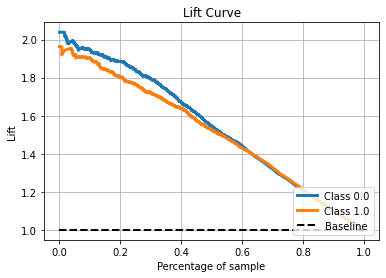

In [29]:
#Predicting the probability and plotting lift
predictions = model4.predict_proba(X)

import scikitplot as skplt
skplt.metrics.plot_lift_curve(y, predictions)